# Regressão Linear com Gradiente Descendente
Modelo simples, para encontrar a relação entre duas variáveis.

## Importação das bibliotecas

In [4]:
import numpy as np
import pandas as pd   #Para ler o dataset.
import matplotlib.pyplot as plt   #Para plotar os gráficos.
import time
from IPython import display
%matplotlib inline

## Dados
Os dados são sobre jogadores de CS:GO.

A primeira coluna é 'Average damage per round', ou 'Dano médio por rodada'.

A segunda coluna é 'Rating', ou 'Classificação' do jogador.

In [9]:
dataset = pd.read_csv('dados/RGR01-ADRvsRating.csv')
data = dataset.values   #Recebe o dataset no formato de matriz, possibilitando o plot abaixo.
num_linhas = data.shape[0]   #Quantidade de linhas do dataset.
dataset.head()   #Exibe as  primeiras linhas do dataset.

,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


Os dados são plotados a seguir.

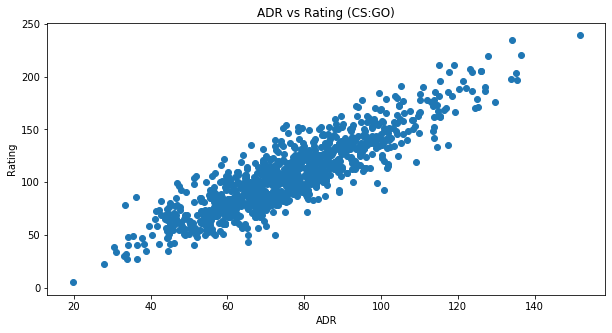

In [3]:
plt.figure(figsize=(10,5))   #Define uma figura, de tamanho 10x5.
plt.title('ADR vs Rating (CS:GO)')   #Título da figura.
plt.scatter(x=data[:,0],y=data[:,1])   #Define as variáveis representadas pelos eixos x e y.
plt.xlabel('ADR')   #Label do eixo x.
plt.ylabel('Rating')   #Label do eixo y.
plt.show()   #Mostra o gráfico na tela.

O objetivo no final é predizer o Rating do jogador, dado seu ADR.

## A Regressão em si

A reta na forma y = m.x + b será usada para modelar os dados.

O método do Gradiente Descendente será usado para encontrar m e b, tais que *minimizem o erro entre o Rating real e o predito pelo modelo.*

O erro será medido através do EMQ - Erro Médio Quadrático, implementado abaixo.

In [4]:
def EMQ(m,b,data):
    '''
    Função que recebe uma reta (através dos parâmetros m e b), que é usada para predizer os 
    valores de Rating do jogador, dado seu Adr. 
    Esses valores são comparados com os Adr's reais, possibilitando a avaliação do erro associado
    a reta recebida.
    '''
    
    erro_total = 0.0
    
    for i in range(num_linhas):
        
        adr = data[i,0]   #Linha i da coluna ADR.
        rating = data[i,1]   #Linha i da coluna Rating.
        
        rating_predito = m*adr + b   #Predizendo o Rating do jogador da linha i.
        
        erro_linha_i = (rating - rating_predito)**2   #Erro associado à linha i.

        erro_total += erro_linha_i   #Somando ao erro total.
    
    return erro_total/num_linhas   #Retorna o erro médio quadrático.

### Exemplo de uso

Calcular e plotar o erro associado à seguinte reta de regressão: y = 2.x + 3.

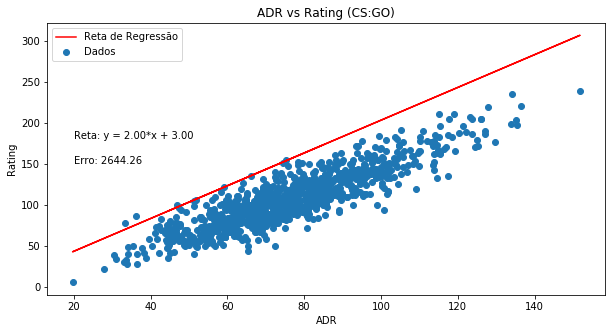

In [47]:
m = 2
b = 3
emq = EMQ(m,b,data)

def mostrar_grafico(m,b,emq):
    
    fig = plt.figure(figsize=(10,5))   #Define a figura, com largura e altura.
    ax = fig.add_subplot(1, 1, 1)   #Adiciona um subplot à figura, na primeira posição. 

    ax.set_title('ADR vs Rating (CS:GO)')   #Título.
    ax.scatter(x=data[:,0],y=data[:,1],label='Dados')   #Plot de espalhamento dos dados, ou seja, via pontos.
    ax.plot(data[:,0], m*data[:,0] + b,color='red',label='Reta de Regressão')   #Plot da reta que tentar modelar os dados.
    ax.set_xlabel('ADR')
    ax.set_ylabel('Rating')
    ax.legend(loc='best')
    plt.text(20, 180, 'Reta: y = %.2f*x + %.2f' % (m,b))
    plt.text(20, 150, 'Erro: %.2f' % (emq))
    
    plt.show()

mostrar_grafico(m,b,emq)

Implementação do Gradiente Descendente.

In [ ]:
def gradiente_descendente(m,b,data,taxa_de_aprendizado):
    
    N = num_linhas   #Número de instâncias do dataset.
    m_grad = 0   #Coeficiente angular 'm', a ser otimizado.
    b_grad = 0   #Coeficiente linear 'b', a ser otimizado.
    
    for i in range(N):

        #Pega o ponto (x,y).
        x = data[i,0]
        y = data[i,1]

        #Derivada parcial da função de erro em relação a 'm'.
        dm = -((2/N) * x * (y - (m*x + b)))
        
        #Derivada parcial da função de erro em relação a 'b'.
        db = -((2/N) * (y - (m*x + b)))
    
        #Atualiza os coeficientes.
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
    #Os valores dos coeficientes são otimizados a seguir.
    m_updated = m - taxa_de_aprendizado*m_grad
    b_updated = b - taxa_de_aprendizado*b_grad
        
    return m_updated, b_updated

## Exemplo de uso
Considerando a reta de regressão y = 2.x + 3, uma taxa de aprendizado de 0.000163 e 10000 iterações.

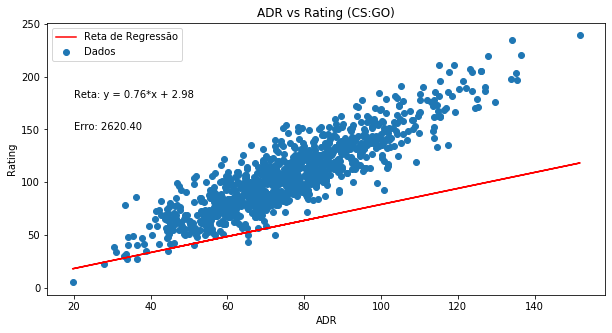

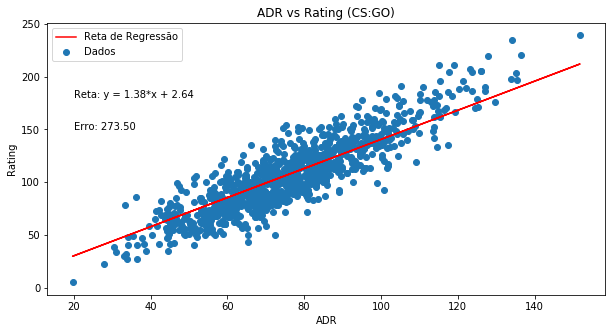

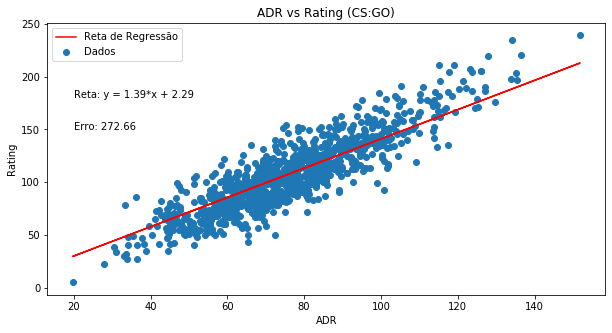

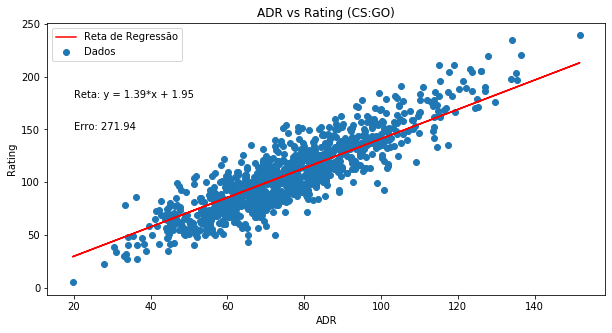

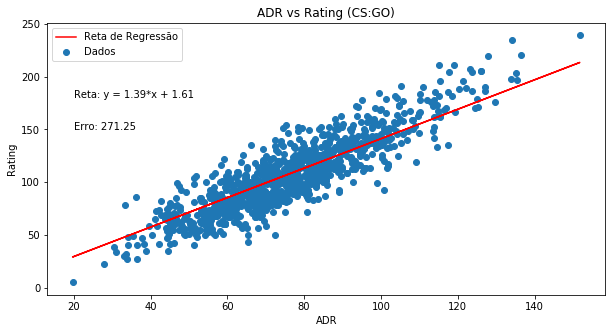

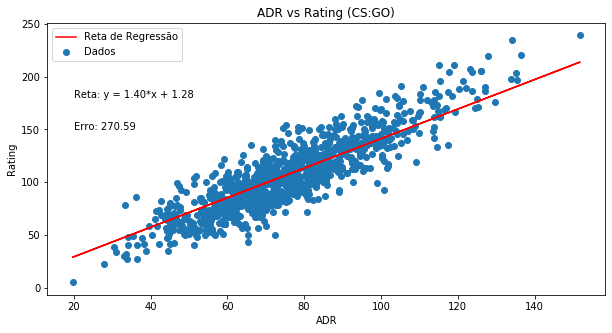

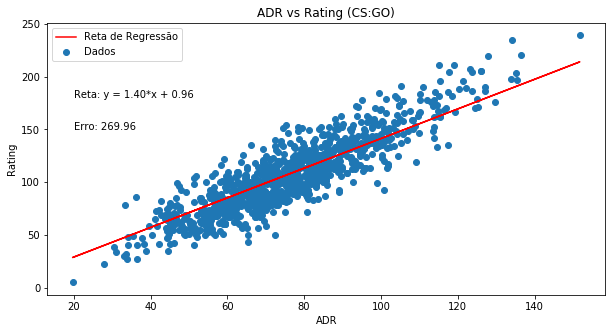

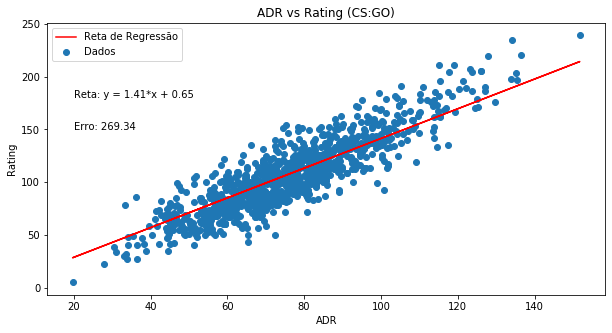

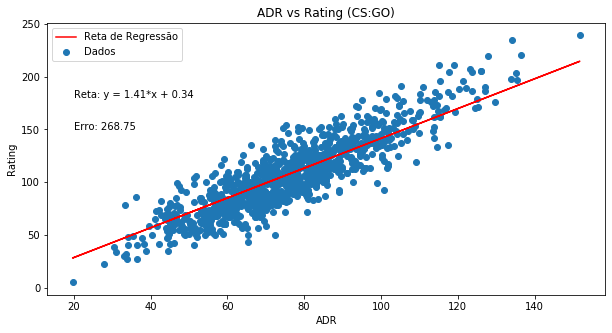

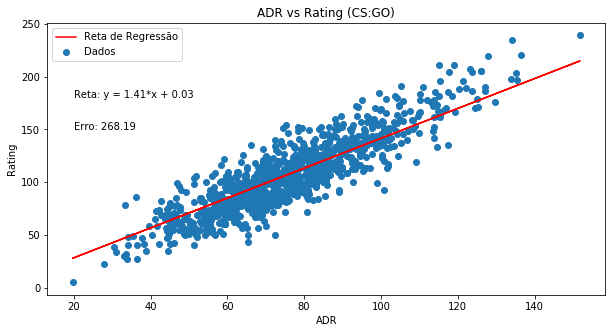

In [78]:
m = 2
b = 3
taxa_de_aprendizado = 0.000163
iteracoes = 10000

emq = EMQ(m,b,data)

for i in range(iteracoes):
    m,b = gradiente_descendente(m,b,data,taxa_de_aprendizado)   #Os coeficientes são atualizados.
    emq = EMQ(m,b,data)   #Atualização do erro.    
    if (i%1000 == 0):
        mostrar_grafico(m,b,emq)    